In [ ]:
import warnings
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
TensorFlow version :  2.5.0
Keras version :  2.5.0


In [ ]:
H, W = 28, 28
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
input_shape = (H, W , 1)
x_train = x_train.reshape(x_train.shape[0], H, W, 1)
x_test = x_test.reshape(x_test.shape[0], H, W, 1)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 하이퍼 파라미터
batch_size = 128
pool_output_size = 120
hidden_size = 100
output_size = 10
max_epochs = 10

t_train = keras.utils.to_categorical(t_train, classes)
t_test = keras.utils.to_categorical(t_test, classes)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential()

# 밑시딥 250p 그대로 구성
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(pool_output_size, activation='swish'))
model.add(Dense(hidden_size, activation='swish'))
model.add(Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 120)               752760    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 766,702
Trainable params: 766,702
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, t_train,
                 batch_size=batch_size,
                 epochs=max_epochs,
                 verbose=1, 
                 validation_data=(x_test, t_test))

Epoch 1/10
469/469 [==============================] - 52s 79ms/step - loss: 0.4369 - accuracy: 0.8726 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.0499 - val_accuracy: 0.9824
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0377 - val_accuracy: 0.9876
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0354 - val_accuracy: 0.9894
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0390 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy : {score[1]*100}%')

Test loss: 0.04245719686150551
Test accuracy : 98.84999990463257%


테스트 케이스 7번째 데이터로 예측한 결과 : [9]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


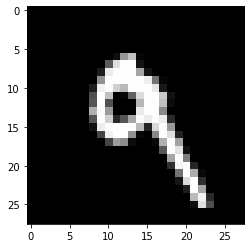

In [45]:
n = 7
img = x_test[n].reshape(28,28)
plt.imshow(img , cmap='gray')

result = model.predict_classes(x_test[n].reshape(1, 28, 28, 1))

print(f'테스트 케이스 {n}번째 데이터로 예측한 결과 : {result}')

In [46]:
path = '/content/drive/MyDrive/deep-learning-from-scratch-master/SimpleCNN.h5'
model.save(path)